In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("dataset/Customers.csv")
products = pd.read_csv("dataset/Products.csv")
transactions = pd.read_csv("dataset/Transactions.csv")


In [4]:
transactions = transactions.merge(products, on="ProductID", how="left")
data = transactions.merge(customers, on="CustomerID", how="left")
data.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName_x,Category_x,Price_y,ProductName_y,Category_y,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [ ]:
customer_features = data.groupby("CustomerID").agg({
    "TotalValue": "sum",  
    "TransactionID": "count",  
    "Price_x": "mean",  
    "Category_x": lambda x: x.mode()[0]  
}).reset_index()



In [9]:
customer_profiles = customers.merge(customer_features, on="CustomerID", how="left")


In [ ]:
encoder = OneHotEncoder(sparse=False)
encoded_region = encoder.fit_transform(customer_profiles[["Region"]])
encoded_category = encoder.fit_transform(customer_profiles[["Category_x"]])

features = np.hstack([
    customer_profiles[["TotalValue", "TransactionID", "Price_x"]].fillna(0),
    encoded_region, encoded_category
])

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
similarity_matrix = cosine_similarity(scaled_features)


In [13]:
lookalike_map = {}
for idx in range(20):  
    customer_id = customer_profiles.iloc[idx]["CustomerID"]
    similarity_scores = similarity_matrix[idx]
    similar_customers = np.argsort(similarity_scores)[::-1][1:4]  
    lookalike_map[customer_id] = [
        (customer_profiles.iloc[i]["CustomerID"], similarity_scores[i]) for i in similar_customers
    ]

In [15]:
clustering_features = np.hstack([
    customer_profiles[["TotalValue", "TransactionID", "Price_x"]].fillna(0),
    encoded_region, encoded_category
])
scaled_clustering_features = scaler.fit_transform(clustering_features)

In [ ]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_clustering_features)
    inertia.append(kmeans.inertia_)

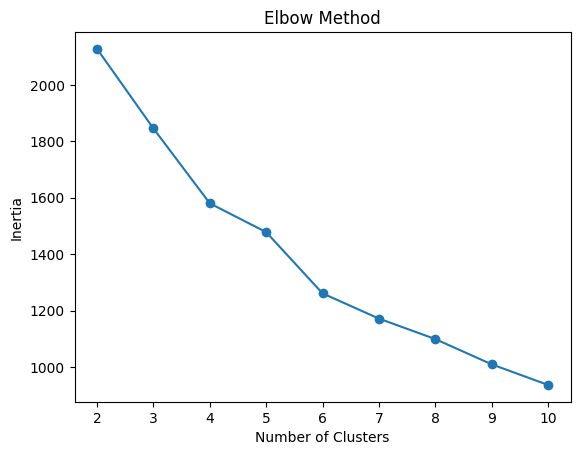

In [17]:
plt.plot(range(2, 11), inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_clustering_features)


d:\anacondawala\envs\meraVm_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anacondawala\envs\meraVm_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
kmeans_labels

array([1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 3, 2, 0, 2, 3, 0, 3, 3, 3, 1, 3, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 2, 3, 0, 0, 1, 3, 2, 2, 1, 0, 3, 0, 3, 3,
       1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 1, 0, 3, 0, 2, 2, 0, 0, 3, 3, 2, 1,
       0, 1, 1, 3, 3, 1, 3, 3, 3, 2, 0, 3, 2, 2, 3, 3, 0, 1, 3, 2, 3, 0,
       2, 3, 1, 0, 0, 3, 1, 1, 2, 0, 0, 2, 3, 1, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 1, 2, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 1, 2, 0, 1, 3, 3,
       0, 0, 3, 2, 3, 2, 3, 1, 0, 3, 0, 0, 0, 1, 3, 1, 0, 0, 2, 2, 3, 1,
       3, 3, 1, 2, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 0,
       3, 2, 2, 0, 1, 2, 0, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 3, 2, 2, 1, 0,
       1, 0])

In [20]:
db_index = davies_bouldin_score(scaled_clustering_features, kmeans_labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.6340320488867353


In [21]:
customer_profiles["Cluster"] = kmeans_labels

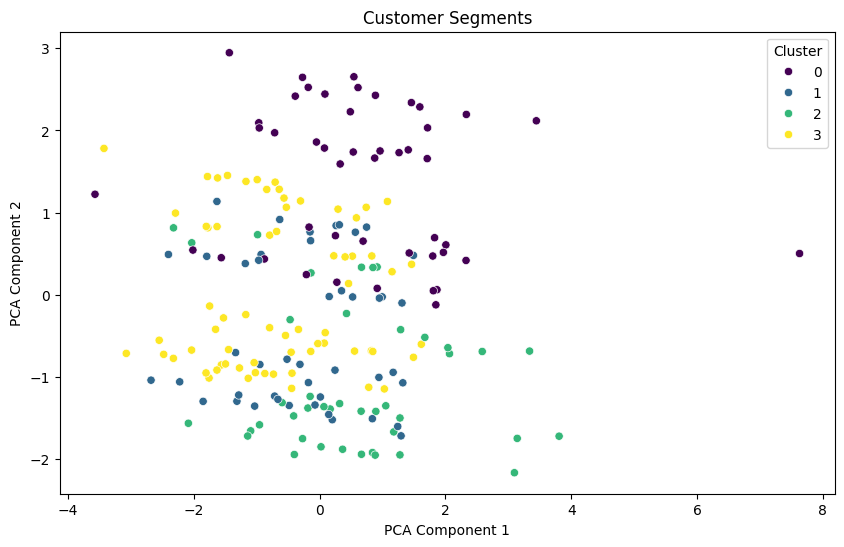

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_clustering_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [23]:
customer_profiles.to_csv("Customer_Segmentation_1.csv", index=False)